In [12]:
import argparse
import time
import matplotlib.pyplot as plt
import numpy as np
import optparse
from dotenv import load_dotenv

from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets
from brainflow import ml_model
from brainflow.ml_model import *


In [15]:
load_dotenv()

In [45]:
BoardShim.enable_dev_board_logger()

board_id = 0
serial_port = os.getenv("SERIAL_PORT")

params = BrainFlowInputParams()
params.serial_port = serial_port
board = BoardShim(board_id, params)
board.prepare_session()
sampling_rate = board.get_sampling_rate(board_id)   # per second, presumably

[2024-03-02 14:16:11.694] [board_logger] [info] incoming json: {
    "file": "",
    "file_anc": "",
    "file_aux": "",
    "ip_address": "",
    "ip_address_anc": "",
    "ip_address_aux": "",
    "ip_port": 0,
    "ip_port_anc": 0,
    "ip_port_aux": 0,
    "ip_protocol": 0,
    "mac_address": "",
    "master_board": -100,
    "other_info": "",
    "serial_number": "",
    "serial_port": "/dev/cu.usbserial-DM03H8QQ",
    "timeout": 0
}
[2024-03-02 14:16:11.694] [board_logger] [trace] Board object created 0
[2024-03-02 14:16:11.694] [board_logger] [info] opening port /dev/cu.usbserial-DM03H8QQ
[2024-03-02 14:16:11.715] [board_logger] [trace] port /dev/cu.usbserial-DM03H8QQ is open
[2024-03-02 14:16:11.730] [board_logger] [trace] set port settings
[2024-03-02 14:16:11.731] [board_logger] [info] set_latency_res is: 0
[2024-03-02 14:16:11.731] [board_logger] [debug] sending v to the board
[2024-03-02 14:16:12.898] [board_logger] [debug] sending d to the board
[2024-03-02 14:16:13.994] [

In [14]:
board.start_stream ()
time.sleep(2)
# data = board.get_current_board_data (256) # get latest 256 packages or less, doesnt remove them from internal buffer
data = board.get_board_data()  # get all data and remove it from internal buffer
board.stop_stream()
board.release_session()

BrainFlowError: BOARD_NOT_CREATED_ERROR:15 unable to start streaming session

In [46]:
model = MLModel(BrainFlowModelParams(0, 0))
model.prepare()
prediction = model.predict(data)
model.release()
prediction

array([1.])

In [18]:
data
# data.to_csv('temp_data.csv', index=False, header=False)

array([[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         1.70000000e+02,  1.71000000e+02,  1.72000000e+02],
       [-9.37500112e+04, -1.87500022e+05, -1.87500022e+05, ...,
        -1.87500022e+05, -1.87500022e+05, -1.87500022e+05],
       [-9.37500112e+04, -1.87500022e+05, -1.87500022e+05, ...,
        -1.87500022e+05, -1.87500022e+05, -1.87500022e+05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.70941647e+09,  1.70941647e+09,  1.70941647e+09, ...,
         1.70941648e+09,  1.70941648e+09,  1.70941648e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [19]:
data.shape

(24, 2476)

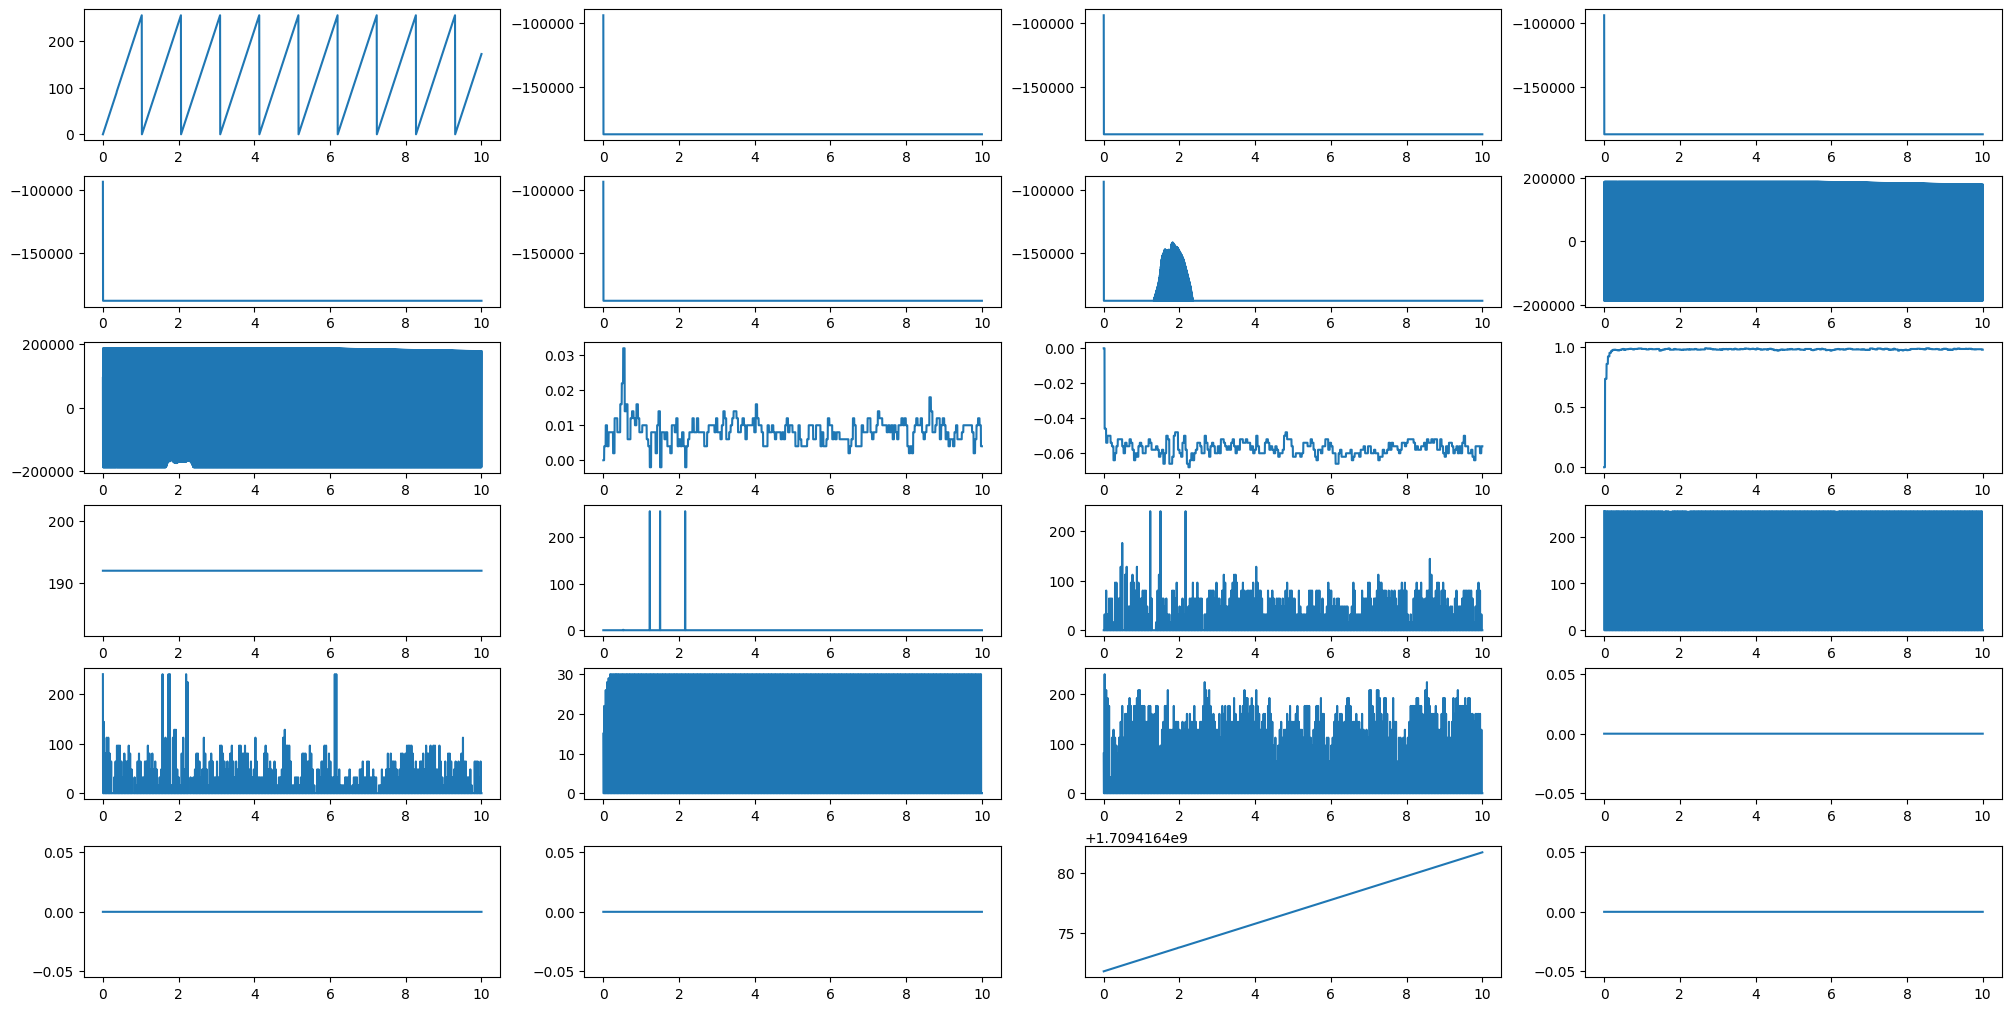

In [20]:
fig, axs = plt.subplots(6, 4, constrained_layout=True, figsize=(20, 10))
for i in range(6):
    for j in range(4):
        d = data[4 * i + j]
        axs[i][j].plot(np.linspace(0, 10, len(d)), d)

In [11]:
board.get_eeg_channels(board_id)

[1, 2, 3, 4, 5, 6, 7, 8]